In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

%matplotlib inline


boston_data = load_boston()
df = pd.DataFrame()
df["MedianHomePrice"] = boston_data.target
df2 = pd.DataFrame(boston_data.data)
df["CrimePerCapita"] = df2.iloc[:, 0]
df.head()

/home/masoud/anaconda3/envs/coding_env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Cali

,MedianHomePrice,CrimePerCapita
0,24.0,0.00632
1,21.6,0.02731
2,34.7,0.02729
3,33.4,0.03237
4,36.2,0.06905


The Boston housing data is a built in dataset in the sklearn library of python.  You will be using two of the variables from this dataset, which are stored in **df**. The median home price in thousands of dollars and the crime per capita in the area of the home are shown above.

`1.` Use this dataframe to fit a linear model to predict the home price based on the crime rate.  Use your output to answer the first quiz below. Don't forget an intercept.

In [3]:
# Adding the intercept
df["intercept"] = 1

In [4]:
# Creating the object
lm = sm.OLS(df["MedianHomePrice"], df[["intercept", "CrimePerCapita"]])

# Calculating the model
results = lm.fit()

# Printing the summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        MedianHomePrice   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Wed, 30 Nov 2022   Prob (F-statistic):           1.17e-19
Time:                        01:05:51   Log-Likelihood:                -1798.9
No. Observations:                 506   AIC:                             3602.
Df Residuals:                     504   BIC:                             3610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept         24.0331      0.409     58.740      0.000      23.229      24.837
CrimePerCapita    -0.4152      0.044     -9.460      0.000      -0.501      -0.329
==============================================================================
Omnibus:                      139.832   Durbin-Watson:                   0.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.404
Skew:                           1.490   Prob(JB):                     7.14e-65
Kurtosis:                       5.264   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

`2.`Plot the relationship between the crime rate and median home price below.  Use your plot and the results from the first question as necessary to answer the remaining quiz questions below.

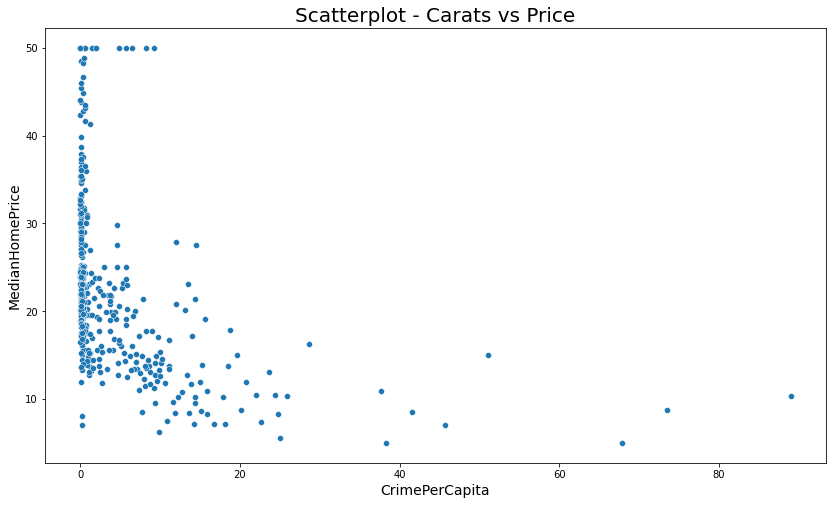

In [5]:
slope = -0.4152
intercept = 24.0331

abline_values = [slope * i + intercept for i in np.array(df.CrimePerCapita)]

plt.figure(figsize=[14, 8])
sns.scatterplot(x=np.array(df.CrimePerCapita), y=np.array(df.MedianHomePrice))
plt.title("Scatterplot - Carats vs Price", fontsize=20)
plt.xlabel("CrimePerCapita", fontsize=14)
plt.ylabel("MedianHomePrice", fontsize=14)
plt.show()

In [6]:
np.sqrt(0.151)

0.38858718455450897